In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Priyatama is ready!')

Priyatama is ready!


In [2]:
data = pd.read_csv('../input/indian-candidates-for-general-election-2019/LS_2.0.csv')

In [3]:
data.head(2)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [4]:
#Rename Multiple columns in a dataframe.
data.rename(columns = {'TOTAL\nVOTES':'TOTALVOTES','CRIMINAL\nCASES':'CRIMINALCASES'}, inplace = True)

In [5]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINALCASES                                245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTALVOTES                                     0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [6]:
data.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [7]:
#Replace multiple words in a column for certain words.
def update_education(row):
    if row['EDUCATION'] in ['Illiterate','Not Available']:
        return 'Iliterate/NA'
    if row['EDUCATION'] in ['5th Pass','8th Pass','10th Pass','12th Pass']:
        return 'School Level'
    elif row['EDUCATION'] in ['Graduate Professional','Graduate']: 
        return 'Graduate'
    elif row['EDUCATION'] in ['Post Graduate\n','Post Graduate', 'Doctorate']:
        return 'Post Graduate/Doctorate'
    else:
        'Literate'
        
data['Education_New'] = data.apply(update_education,axis =1)

In [8]:
data['CRIMINALCASES'] = data['CRIMINALCASES'].replace({'Not Available': 0})
data['CRIMINALCASES'] = data['CRIMINALCASES'].fillna(0)

In [9]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINALCASES                                  0
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTALVOTES                                     0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
Education_New                                325
dtype: int64

In [10]:
data.Education_New.unique()

array(['School Level', 'Post Graduate/Doctorate', None, 'Graduate',
       'Iliterate/NA'], dtype=object)

In [11]:
#Replace NA in Education_New wth Iliterate/NA.
data['Education_New'].fillna('Iliterate/NA', inplace=True)

In [12]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(*args, **kwargs)
    Alias for :func:`set_theme`, which is the preferred interface.



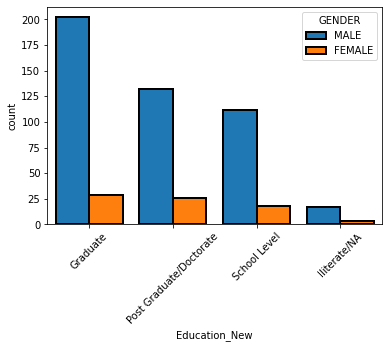

In [13]:
#Sort Countplot by using Order
#Filter applied on column 'Winner', for not equal to 0. And with that filter applied, count of column 'Education_New' is applied.
sns.countplot(x=data[data['WINNER'] != 0]['Education_New'],               
              order=data[data['WINNER'] != 0]['Education_New'].value_counts().index,hue = data['GENDER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

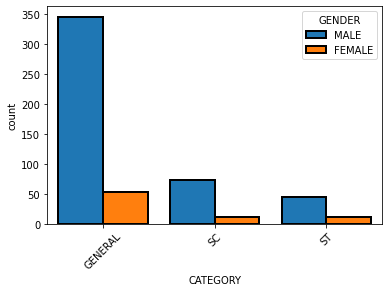

In [14]:
sns.countplot(x=data[data['WINNER'] != 0]['CATEGORY'],               
              order=data[data['WINNER'] != 0]['CATEGORY'].value_counts().index,hue = data['GENDER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

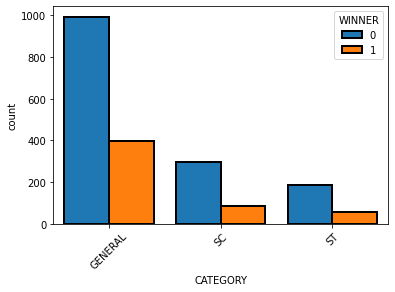

In [15]:
#Countplot of varies category, with a hue of winner.
sns.countplot(x=data['CATEGORY'],               
              order=data['CATEGORY'].value_counts().index,hue = data['WINNER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [16]:
#Filter for value not equal to 0 in column Winner, and then count of winner of each category.
new_df = data[data['WINNER'] != 0].CATEGORY.value_counts().reset_index() #Use .reset.index() to store it as a DF
new_df 

,index,CATEGORY
0,GENERAL,399
1,SC,85
2,ST,55


In [17]:
#Rename of Columns
new_df.rename(columns = {'index':'Category','CATEGORY':'Count'}, inplace = True)
new_df 

,Category,Count
0,GENERAL,399
1,SC,85
2,ST,55


In [18]:
#Set Category as index so Pie Chart can use it as a label.
new_df.set_index('Category', inplace= True)

<AxesSubplot:ylabel='Count'>

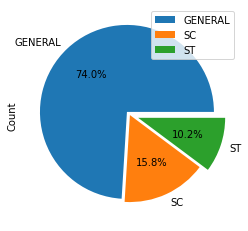

In [19]:
new_df.plot.pie(y='Count', explode = (0.05,0,0.1),autopct='%1.1f%%')

In [20]:
#Filter for value not equal to 0 in column Winner, and then count of win of each Party and save as a list.
new_df2 = data[data['WINNER'] != 0].PARTY.value_counts()
new_df2

BJP       300
INC        52
DMK        23
AITC       22
YSRCP      22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
NCP         5
CPI(M)      5
SP          5
IND         4
IUML        3
TDP         3
JKN         3
SAD         2
AIMIM       2
ADAL        2
AJSUP       1
KEC(M)      1
RSP         1
NPEP        1
AIUDF       1
NDPP        1
AIADMK      1
NPF         1
RLTP        1
MNF         1
VCK         1
JD(S)       1
JMM         1
AAP         1
SKM         1
Name: PARTY, dtype: int64

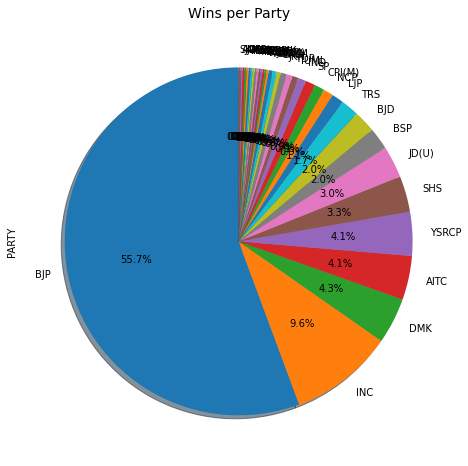

In [21]:
pie, ax = plt.subplots(figsize=[30,8]) #To Size the Pie Chart
new_df2.plot.pie(x=new_df2,autopct='%1.1f%%',startangle=90, shadow=True, legend = False)
plt.title("Wins per Party", fontsize=14) #Title of Pie Chart
pie.savefig("Wins per Party.png") #Save a figure as a png.

In [22]:
top_20parties = pd.Series(data['PARTY'].value_counts().head(21))
top_20parties

BJP       420
INC       413
NOTA      245
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
MNM        36
SHS        26
TDP        25
AAP        25
YSRCP      25
DMK        23
NCP        21
RJD        21
AIADMK     21
BJD        21
JnP        20
Name: PARTY, dtype: int64

In [23]:
top_20parties = top_20parties.index.drop(['IND'])
top_20parties

Index(['BJP', 'INC', 'NOTA', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP', 'NTK',
       'MNM', 'SHS', 'TDP', 'AAP', 'YSRCP', 'DMK', 'NCP', 'RJD', 'AIADMK',
       'BJD', 'JnP'],
      dtype='object')

In [24]:
#Parties groupby most seats won, Top 5.
Vote_share=data.groupby("PARTY")["WINNER"].sum().nlargest(5).index.tolist()
Vote_share

['BJP', 'INC', 'DMK', 'AITC', 'YSRCP']

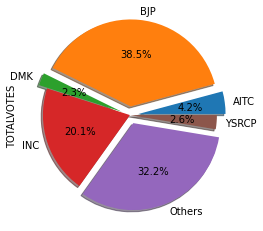

In [25]:
def fuc(row):
    if row["PARTY"] not in Vote_share:
        return("Others")
    else:
        return row['PARTY']
data['Party_new']=data.apply(fuc,axis=1)
data.head()
Top5=data.groupby("Party_new")["TOTALVOTES"].sum()
explode = (0.1,0.1,0.1,0,0.1,0)
Top5_index=Top5.index
Top5_label=Top5.values
Top5.plot.pie(labels=Top5_index,
        shadow=True, startangle=0,explode = explode,autopct='%1.1f%%');